In [1]:
#Count each brand how many picture they are
import os
import re

brand_total = list()
brand_set = list()

original_data = r'/Users/dan/Desktop/DL_Car_logo/car_brand_pic' #original dataset dir path
for f in os.listdir(original_data):
    brand_total.append(re.split(r'[0-9]+_',f)[0])
    
brand_set = set(brand_total)
for b in brand_set:
    c = brand_total.count(b)
    print(f'{b} * {c} times.')

Mazda * 484 times.
Tata * 303 times.
Peugeot * 605 times.
Suzuki * 467 times.
Nissan * 538 times.
Dodge * 316 times.
Kia * 490 times.
Saab * 431 times.
Subaru * 501 times.
Chevrolet * 663 times.
Ford * 667 times.
Audi * 744 times.
Maserati * 561 times.
Land Rover * 656 times.
Volkswagen * 644 times.
Lexus * 612 times.
Porsche * 584 times.
Hyundai * 488 times.
Ferrari * 645 times.
Mercedes * 698 times.
Jaguar * 404 times.
Daewoo * 318 times.
Renault * 632 times.
Seat * 374 times.
Dacia * 363 times.
Alfa Romeo * 852 times.
Toyota * 615 times.
Volvo * 406 times.
Tesla * 559 times.
Opel * 593 times.
Honda * 456 times.
Jeep * 500 times.
Skoda * 551 times.
Lada * 354 times.
Rover * 126 times.
Mitsubishi * 585 times.
Fiat * 493 times.
Lancia * 460 times.
BMW * 602 times.
Citroen * 438 times.


In [24]:
#Make dir and classify the dataset
from shutil import copyfile

original_data = r'/Users/dan/Desktop/DL_Car_logo/car_brand_pic' #original dataset dir path
base_dir = r'/Users/dan/Desktop/DL_Car_logo/dataset' #base dir path for classification data

train_dir = os.path.join(base_dir, 'train')
if not os.path.isdir(train_dir):
    os.mkdir(train_dir)
    
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.isdir(validation_dir):
    os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
if not os.path.isdir(test_dir):
    os.mkdir(test_dir)
    
for b in brand_set:
    if not os.path.isdir(os.path.join(train_dir, b)):
        os.mkdir(os.path.join(train_dir, b))
    
    if not os.path.isdir(os.path.join(validation_dir, b)):
        os.mkdir(os.path.join(validation_dir, b))
    
    if not os.path.isdir(os.path.join(test_dir, b)):
        os.mkdir(os.path.join(test_dir, b))
        
for b in brand_set:
    tmp = [f for f in os.listdir(original_data) if b == re.split(r'[0-9]+_',f)[0]]
    for f in tmp[-50:]:
        copyfile(os.path.join(original_data,f),os.path.join(os.path.join(test_dir, b), f))
        
    for f in tmp[-100:-50]:
        copyfile(os.path.join(original_data,f),os.path.join(os.path.join(validation_dir, b), f))
        
    for f in tmp[:-100]:
        copyfile(os.path.join(original_data,f),os.path.join(os.path.join(train_dir, b), f))
        
print('Done.')

Done.


In [25]:
for b in brand_set:
    file_train = len(os.listdir(os.path.join(train_dir, b)))
    print(f'train data {b} : {file_train}')
    
for b in brand_set:
    file_validation = len(os.listdir(os.path.join(validation_dir, b)))
    print(f'vailidation data {b} : {file_validation}')
    
for b in brand_set:
    file_test = len(os.listdir(os.path.join(test_dir, b)))
    print(f'test data {b} : {file_test}')

train data Mazda : 384
train data Tata : 203
train data Peugeot : 505
train data Suzuki : 367
train data Nissan : 438
train data Dodge : 216
train data Kia : 390
train data Saab : 331
train data Subaru : 401
train data Chevrolet : 563
train data Ford : 567
train data Audi : 644
train data Maserati : 461
train data Land Rover : 556
train data Volkswagen : 544
train data Lexus : 512
train data Porsche : 484
train data Hyundai : 388
train data Ferrari : 545
train data Mercedes : 598
train data Jaguar : 304
train data Daewoo : 218
train data Renault : 532
train data Seat : 274
train data Dacia : 263
train data Alfa Romeo : 752
train data Toyota : 515
train data Volvo : 306
train data Tesla : 459
train data Opel : 493
train data Honda : 356
train data Jeep : 400
train data Skoda : 451
train data Lada : 254
train data Rover : 26
train data Mitsubishi : 485
train data Fiat : 393
train data Lancia : 360
train data BMW : 502
train data Citroen : 338
vailidation data Mazda : 50
vailidation data 

In [81]:
#build model
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='valid', activation='relu', input_shape=(50, 50, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='valid', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), padding='valid', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(40, activation='softmax'))
model.summary()  
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 2048)            

In [67]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True) 
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,              # 目標目錄
    target_size=(50, 50),  # 調整所有影像大小成 150x150
    batch_size=20,
    class_mode='categorical')    # 因為使用二元交叉熵 binary_crossentropy 作為損失值，所以需要二位元標籤


validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(50, 50),
    batch_size=20,
    class_mode='categorical')


Found 16778 images belonging to 40 classes.
Found 2000 images belonging to 40 classes.


In [68]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 50, 50, 3)
labels batch shape: (20, 40)


In [82]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=500,
    epochs=300,
    validation_data=validation_generator,
    validation_steps=50)


Epoch 1/300
500/500 [==============================] - 48s 93ms/step - loss: 3.6449 - acc: 0.0491 - val_loss: 3.6500 - val_acc: 0.0620
Epoch 2/300
500/500 [==============================] - 48s 96ms/step - loss: 3.5028 - acc: 0.0878 - val_loss: 3.6158 - val_acc: 0.0800
Epoch 3/300
500/500 [==============================] - 39s 78ms/step - loss: 3.4272 - acc: 0.1113 - val_loss: 3.5109 - val_acc: 0.0950
Epoch 4/300
500/500 [==============================] - 40s 79ms/step - loss: 3.3392 - acc: 0.1311 - val_loss: 3.4834 - val_acc: 0.1120
Epoch 5/300
500/500 [==============================] - 40s 80ms/step - loss: 3.2516 - acc: 0.1530 - val_loss: 3.3008 - val_acc: 0.1580
Epoch 6/300
500/500 [==============================] - 41s 81ms/step - loss: 3.1894 - acc: 0.1700 - val_loss: 3.2257 - val_acc: 0.2080
Epoch 7/300
500/500 [==============================] - 51s 101ms/step - loss: 3.1796 - acc: 0.1832 - val_loss: 3.3138 - val_acc: 0.1750
Epoch 8/300
500/500 [==============================] -

500/500 [==============================] - 38s 75ms/step - loss: 2.0533 - acc: 0.4676 - val_loss: 1.9668 - val_acc: 0.5420
Epoch 62/300
500/500 [==============================] - 38s 75ms/step - loss: 2.0034 - acc: 0.4783 - val_loss: 1.9404 - val_acc: 0.5260
Epoch 63/300
500/500 [==============================] - 38s 76ms/step - loss: 2.0211 - acc: 0.4688 - val_loss: 2.1768 - val_acc: 0.5050
Epoch 64/300
500/500 [==============================] - 38s 76ms/step - loss: 2.0096 - acc: 0.4794 - val_loss: 1.9460 - val_acc: 0.5190
Epoch 65/300
500/500 [==============================] - 38s 75ms/step - loss: 2.0010 - acc: 0.4783 - val_loss: 2.0444 - val_acc: 0.5180
Epoch 66/300
500/500 [==============================] - 38s 75ms/step - loss: 1.9962 - acc: 0.4786 - val_loss: 1.8177 - val_acc: 0.5550
Epoch 67/300
500/500 [==============================] - 38s 75ms/step - loss: 1.9757 - acc: 0.4909 - val_loss: 2.2263 - val_acc: 0.4890
Epoch 68/300
500/500 [==============================] - 38s 7

500/500 [==============================] - 39s 77ms/step - loss: 1.6601 - acc: 0.5610 - val_loss: 1.6216 - val_acc: 0.6310
Epoch 122/300
500/500 [==============================] - 38s 77ms/step - loss: 1.6628 - acc: 0.5682 - val_loss: 1.8158 - val_acc: 0.5960
Epoch 123/300
500/500 [==============================] - 39s 77ms/step - loss: 1.5906 - acc: 0.5898 - val_loss: 1.5927 - val_acc: 0.6130
Epoch 124/300
500/500 [==============================] - 38s 77ms/step - loss: 1.6329 - acc: 0.5712 - val_loss: 1.7702 - val_acc: 0.6330
Epoch 125/300
500/500 [==============================] - 38s 76ms/step - loss: 1.6225 - acc: 0.5783 - val_loss: 1.7191 - val_acc: 0.6020
Epoch 126/300
500/500 [==============================] - 38s 77ms/step - loss: 1.6068 - acc: 0.5828 - val_loss: 1.7080 - val_acc: 0.5990
Epoch 127/300
500/500 [==============================] - 36s 72ms/step - loss: 1.5850 - acc: 0.5903 - val_loss: 1.8471 - val_acc: 0.5770
Epoch 128/300
500/500 [==============================] 

Epoch 181/300
500/500 [==============================] - 40s 81ms/step - loss: 1.4874 - acc: 0.6184 - val_loss: 1.7309 - val_acc: 0.6380
Epoch 182/300
500/500 [==============================] - 46s 92ms/step - loss: 1.4928 - acc: 0.6142 - val_loss: 2.1141 - val_acc: 0.6090
Epoch 183/300
500/500 [==============================] - 50s 101ms/step - loss: 1.4913 - acc: 0.6179 - val_loss: 1.7175 - val_acc: 0.6350
Epoch 184/300
500/500 [==============================] - 61s 122ms/step - loss: 1.4687 - acc: 0.6243 - val_loss: 1.5604 - val_acc: 0.6350
Epoch 185/300
500/500 [==============================] - 50s 100ms/step - loss: 1.4787 - acc: 0.6208 - val_loss: 1.7718 - val_acc: 0.6220
Epoch 186/300
500/500 [==============================] - 46s 92ms/step - loss: 1.4636 - acc: 0.6184 - val_loss: 1.8404 - val_acc: 0.6300
Epoch 187/300
500/500 [==============================] - 46s 91ms/step - loss: 1.5300 - acc: 0.5998 - val_loss: 1.9257 - val_acc: 0.6330
Epoch 188/300
500/500 [===============

KeyboardInterrupt: 

In [83]:
model.save('car_brand_identity.h5')

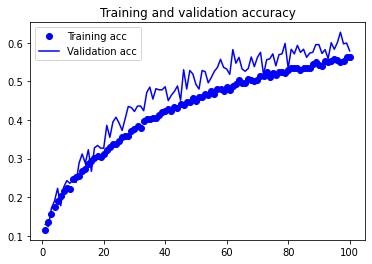

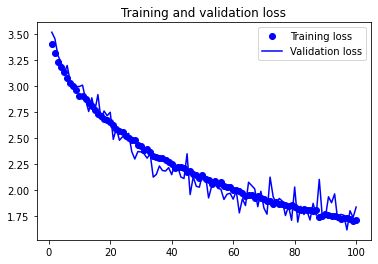

In [85]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

(50, 50, 3)
[1.8426510e-09 6.9493455e-24 6.6831251e-15 2.0457009e-22 9.5625532e-22
 4.5329854e-27 1.9214063e-22 2.1219055e-17 9.4100600e-15 2.3234578e-21
 7.3520530e-23 9.1930392e-19 1.8115611e-22 8.9235857e-30 9.7220379e-22
 2.3291217e-19 1.0975609e-22 1.8674836e-15 3.9327003e-10 2.2443049e-14
 1.9686055e-24 1.8697830e-18 1.8620005e-21 2.3337138e-24 3.3397323e-15
 3.2187665e-16 1.2493036e-25 1.2533391e-22 6.5115057e-20 0.0000000e+00
 1.5870306e-22 1.2221737e-21 1.0000000e+00 1.3980589e-19 8.7996466e-18
 4.2931852e-27 1.3227716e-20 6.8437894e-19 7.4878451e-11 2.4711872e-20]
32
Skoda 100.0


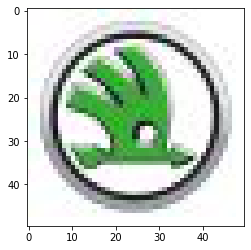

In [86]:
##Test model accuracy with out of training data
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

realImg = Image.open('./Skoda.jpg').convert('RGB')
realImg.size
realImg = np.array(realImg)/255
print(realImg.shape)

result = model.predict(np.array(realImg).reshape(-1, 50, 50, 3))
print(result[0])
preIndex = np.argmax(result[0])
print(preIndex)
print(sorted(brand_set)[preIndex], result[0][preIndex]*100)
plt.imshow(realImg)